# Analysis on Chipotle Dataset

You have file called chipotle.tsv and it looks like:

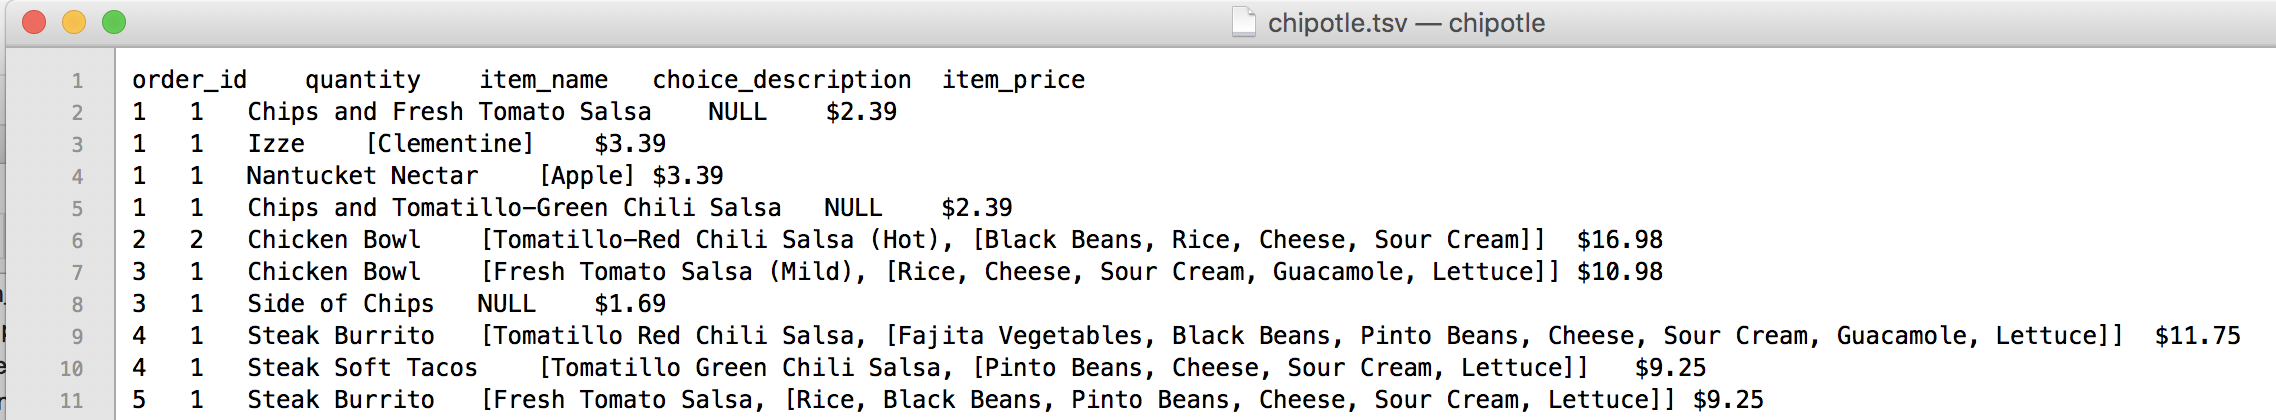

In [32]:
import pandas as pd

Read data file and create a dataframe called chipo

In [33]:
chipo=pd.read_csv("chipotle.tsv",sep="\t")

In [34]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## How many products cost more than $10 ?

First, we need to convert item_price column into numeric form, it is in string format now.
<br> We need to get rid of the dollar character.

In [35]:
chipo.item_price.head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

First remove the dollar character in the item_price column and then convert it to a numeric form

In [36]:
# remove the $ character
chipo.item_price=chipo.item_price.str.replace("$","")

In [37]:
# convert the item_price column into floating point number
chipo.item_price=chipo.item_price.astype(float)

In [38]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


now item_price column contains numeric data, we continue with analysis
<br>let's create a new dataframe for items that cost more than 10$

In [39]:
chipo10=chipo[chipo.item_price>10]

In [40]:
len(chipo10)

1130

There seems to be 1130 lines that the price is greater than $10.
<br> Note that the quantity of some items is more than one, so to get the price of each item we need to divide the price by the quantity number.

In [41]:
chipo["price_per_item"]=chipo.item_price/chipo.quantity

In [42]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price_per_item
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49


Now, check how many unique item_name we have

In [43]:
chipo.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [44]:
len(chipo.item_name.unique())

50

Note that the dataset contains duplicates, we should get rid of duplicates

In [45]:
chipo_unique_items=chipo.drop_duplicates("item_name")

In [46]:
chipo_unique_items.head(20)

,order_id,quantity,item_name,choice_description,item_price,price_per_item
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
10,5,1,Chips and Guacamole,NaN,4.45,4.45
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75


Now, we can correctly calculate the number of items that cost more than $10

In [47]:
chipo_unique_items.price_per_item>10

0       False
1       False
2       False
3       False
4       False
6       False
7        True
8       False
10      False
11      False
12      False
16      False
18      False
21      False
27      False
33      False
34      False
38      False
39       True
40      False
44      False
54      False
56      False
57       True
62       True
92      False
111     False
168      True
186      True
191     False
233     False
237     False
250      True
263     False
281      True
298     False
300     False
445     False
510     False
520     False
554     False
664     False
674     False
738      True
1132     True
1229     True
1414    False
1653    False
1694    False
3750    False
Name: price_per_item, dtype: bool

In [48]:
(chipo_unique_items.price_per_item>10).sum()

11

There are 11 items that cost more than 10$

Let's sort the table by price per item column

In [49]:
chipo_sorted=chipo_unique_items.sort_values(by="price_per_item",ascending=False)

In [50]:
chipo_sorted.head()

,order_id,quantity,item_name,choice_description,item_price,price_per_item
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,11.89
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,11.89
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75,11.75


If we want to only get item names and their prices:

In [51]:
chipo_pricelist=chipo_sorted[["item_name","price_per_item"]]

In [52]:
chipo_pricelist.head()

,item_name,price_per_item
281,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
39,Barbacoa Bowl,11.75


Playing with index: resetting and setting index

In [53]:
chipo_pricelist.reset_index(drop=True)

,item_name,price_per_item
0,Steak Salad Bowl,11.89
1,Barbacoa Salad Bowl,11.89
2,Carnitas Salad Bowl,11.89
3,Steak Burrito,11.75
4,Barbacoa Bowl,11.75
5,Barbacoa Crispy Tacos,11.75
6,Veggie Salad Bowl,11.25
7,Veggie Soft Tacos,11.25
8,Veggie Burrito,11.25
9,Veggie Bowl,11.25


In [54]:
chipo_pricelist.set_index("item_name",inplace=True)

In [55]:
chipo_pricelist.head()

,price_per_item
item_name,
Steak Salad Bowl,11.89
Barbacoa Salad Bowl,11.89
Carnitas Salad Bowl,11.89
Steak Burrito,11.75
Barbacoa Bowl,11.75


now we can get price of specific item

In [56]:
chipo_pricelist.loc["Steak Burrito"]

price_per_item    11.75
Name: Steak Burrito, dtype: float64

if we want to see top-5 most expensive items

In [57]:
chipo_pricelist.iloc[:5]

,price_per_item
item_name,
Steak Salad Bowl,11.89
Barbacoa Salad Bowl,11.89
Carnitas Salad Bowl,11.89
Steak Burrito,11.75
Barbacoa Bowl,11.75


### How many times were a Veggie Salad Bowl ordered?

In [58]:
chipo_salad=chipo[chipo.item_name=="Veggie Salad Bowl"]

In [59]:
len(chipo_salad)

18

### How many times people ordered more than one Canned Soda?

In [60]:
chipo_canned_soda=chipo[(chipo.item_name=="Canned Soda") & (chipo.quantity >1)]

In [61]:
len(chipo_canned_soda)

20

### To see how many times each item was ordered:

In [62]:
chipo.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

### Let’s find out the total quantity of the chicken containing items

we will create a new column with a name chicken_check

First, we create a function to check if chicken is in the item_name or not

In [63]:
def myfunct(x):
    if "Chicken" in x:
        return 1
    else:
        return 0


In [64]:
chipo["chicken_check"]=chipo.item_name.map(myfunct)

In [65]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price_per_item,chicken_check
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,0
1,1,1,Izze,[Clementine],3.39,3.39,0
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,1


now we create a new column for total_chicken_order

In [66]:
chipo["total_chicken_order"]=chipo.quantity*chipo.chicken_check

In [67]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price_per_item,chicken_check,total_chicken_order
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,0,0
1,1,1,Izze,[Clementine],3.39,3.39,0,0
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,0,0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,0,0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,1,2


In [68]:
chipo.total_chicken_order.sum()

1654

Using lambda function inside map function
<br> first delete chicken_check column

In [69]:
del chipo["chicken_check"]

In [70]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price_per_item,total_chicken_order
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,0
1,1,1,Izze,[Clementine],3.39,3.39,0
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,2


In [71]:
chipo["chicken_check"]=chipo.item_name.map(lambda x: 1 if "Chicken" in x else 0)

In [72]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price_per_item,total_chicken_order,chicken_check
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,0,0
1,1,1,Izze,[Clementine],3.39,3.39,0,0
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,0,0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,0,0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,2,1


### Calculate total quantity for each item


In [75]:
# use pivot table
chipo.pivot_table(values="quantity",index="item_name",aggfunc="sum")

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6
